In [ ]:
pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS,DilatedRNN
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,-0.5,-0.333333,-0.500000,-0.500000
1,2002-01-08,-0.5,-0.333333,-0.266667,-0.480822
2,2002-01-15,-0.5,-0.333333,-0.033333,-0.461644
3,2002-01-22,-0.5,-0.333333,0.200000,-0.442466
4,2002-01-29,-0.5,-0.333333,0.433333,-0.423288
...,...,...,...,...,...
961,2020-06-02,-0.5,-0.333333,-0.466667,-0.080822
962,2020-06-09,-0.5,-0.333333,-0.233333,-0.061644
963,2020-06-16,-0.5,-0.333333,0.000000,-0.042466
964,2020-06-23,-0.5,-0.333333,0.233333,-0.023288


In [ ]:
Y_df

,ds,unique_id,y
0,2002-01-01,% WEIGHTED ILI,-0.421499
1,2002-01-01,%UNWEIGHTED ILI,-0.472442
2,2002-01-01,AGE 0-4,-0.981641
3,2002-01-01,AGE 5-24,-0.692621
4,2002-01-01,ILITOTAL,-0.819695
...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263
6758,2020-06-30,AGE 5-24,0.023051
6759,2020-06-30,ILITOTAL,0.651678
6760,2020-06-30,NUM. OF PROVIDERS,3.454565


In [ ]:
a=Y_df['unique_id'].unique()
a.size

7

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,% WEIGHTED ILI,-0.421499,-0.5,-0.333333,-0.500000,-0.50000
1,2002-01-01,%UNWEIGHTED ILI,-0.472442,-0.5,-0.333333,-0.500000,-0.50000
2,2002-01-01,AGE 0-4,-0.981641,-0.5,-0.333333,-0.500000,-0.50000
3,2002-01-01,AGE 5-24,-0.692621,-0.5,-0.333333,-0.500000,-0.50000
4,2002-01-01,ILITOTAL,-0.819695,-0.5,-0.333333,-0.500000,-0.50000
...,...,...,...,...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263,-0.5,-0.333333,0.466667,-0.00411
6758,2020-06-30,AGE 5-24,0.023051,-0.5,-0.333333,0.466667,-0.00411
6759,2020-06-30,ILITOTAL,0.651678,-0.5,-0.333333,0.466667,-0.00411
6760,2020-06-30,NUM. OF PROVIDERS,3.454565,-0.5,-0.333333,0.466667,-0.00411


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = range(len(filtered_df))
Y_df=filtered_df
Y_df

<ipython-input-30-ca2bf7442fa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
<ipython-input-30-ca2bf7442fa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


## Horizon 24

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:942,:]
Y_test_df = Y_df.iloc[942:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,942,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,943,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,944,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,945,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,946,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,947,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,948,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,949,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,950,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,951,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
model=DilatedRNN(h=24,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 24.2 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
310 K     Trainable params
0         Non-trainable params
310 K     Total params
1.241     Total estimated model params size (MB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,3.734034
OT,1,3.825168
OT,2,3.892293
OT,3,3.899659
OT,4,3.517629
OT,5,3.850363
OT,6,3.412111
OT,7,3.432281
OT,8,3.418211


<Axes: xlabel='ds'>

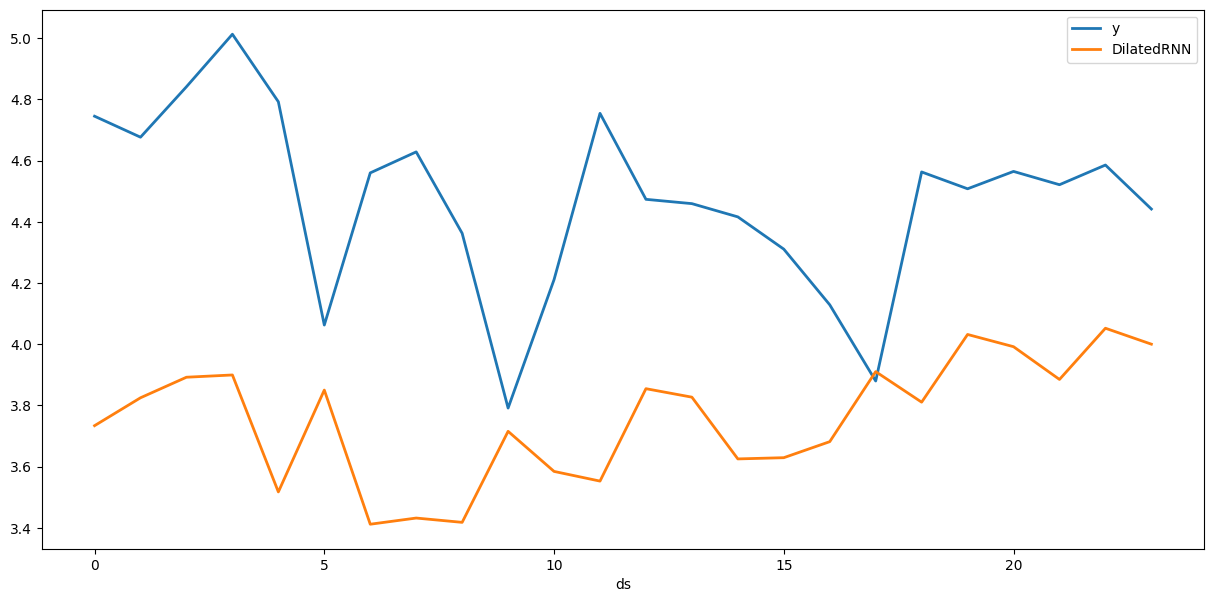

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,3.734034
1,3.825168
2,3.892293
3,3.899659
4,3.517629
5,3.850363
6,3.412111
7,3.432281
8,3.418211


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.717
DilatedRNN MSE: 0.630


## Horizon 36

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:930,:]
Y_test_df = Y_df.iloc[930:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,930,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,931,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,932,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,933,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,934,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,935,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,936,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,937,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,938,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,939,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
model=DilatedRNN(h=36,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 36.4 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
322 K     Trainable params
0         Non-trainable params
322 K     Total params
1.289     Total estimated model params size (MB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,2.365167
OT,1,2.323520
OT,2,2.246009
OT,3,2.266931
OT,4,2.209116
OT,5,2.267082
OT,6,2.133840
OT,7,2.043814
OT,8,2.127930


<Axes: xlabel='ds'>

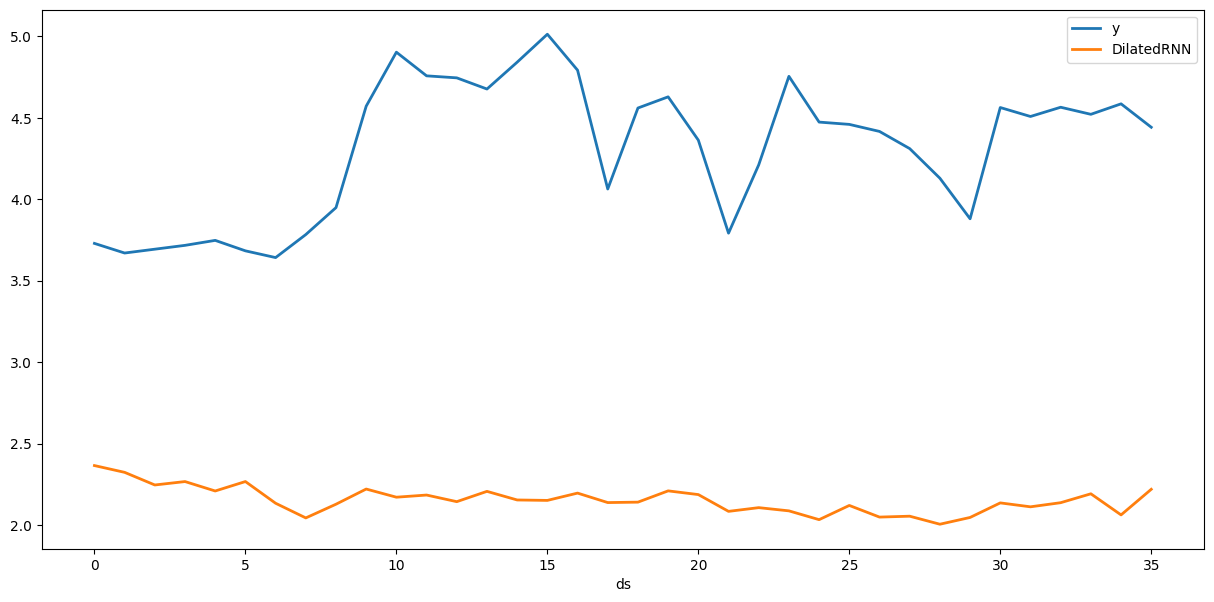

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,2.365167
1,2.323520
2,2.246009
3,2.266931
4,2.209116
5,2.267082
6,2.133840
7,2.043814
8,2.127930


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 2.156
DilatedRNN MSE: 4.842


## Horizon 48

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:918,:]
Y_test_df = Y_df.iloc[918:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,918,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,919,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,920,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,921,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,922,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,923,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,924,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,925,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,926,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,927,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
model=DilatedRNN(h=48,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 48.5 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
334 K     Trainable params
0         Non-trainable params
334 K     Total params
1.338     Total estimated model params size (MB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,1.676169
OT,1,1.600625
OT,2,1.597949
OT,3,1.618006
OT,4,1.570386
OT,5,1.577237
OT,6,1.524157
OT,7,1.532419
OT,8,1.550033


<Axes: xlabel='ds'>

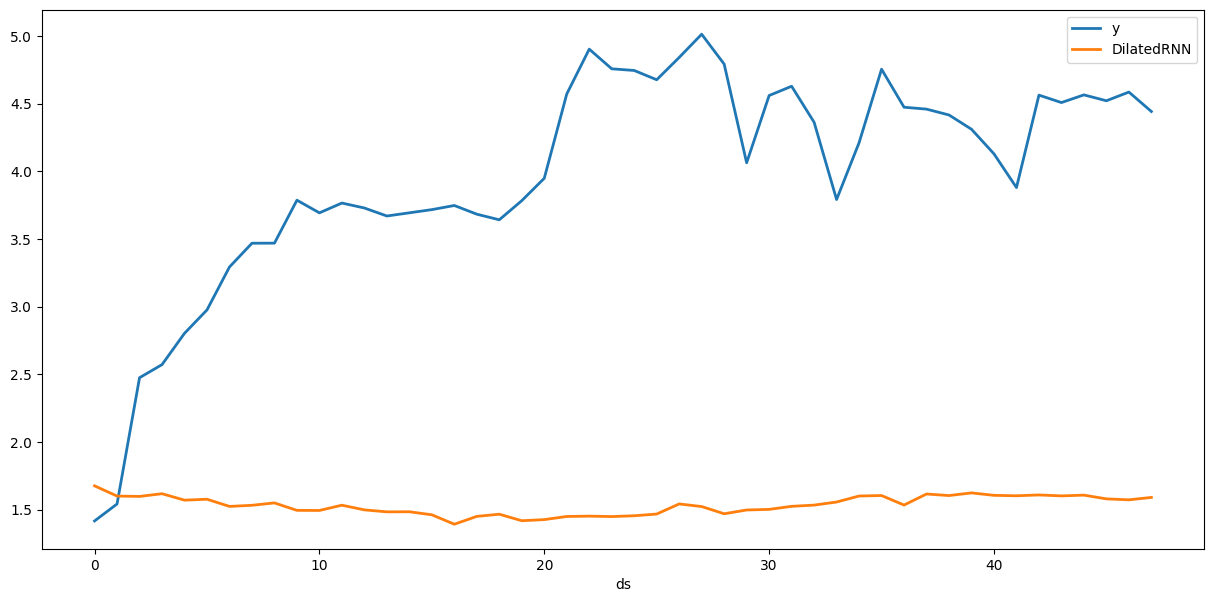

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,1.676169
1,1.600625
2,1.597949
3,1.618006
4,1.570386
5,1.577237
6,1.524157
7,1.532419
8,1.550033


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 2.446
DilatedRNN MSE: 6.584


## Horizon 60

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:908,:]
Y_test_df = Y_df.iloc[908:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,908,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,909,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,910,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,911,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,912,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,913,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,914,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,915,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,916,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,917,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
model=DilatedRNN(h=60,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 60.6 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
346 K     Trainable params
0         Non-trainable params
346 K     Total params
1.386     Total estimated model params size (MB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,1.313795
OT,1,1.294883
OT,2,1.305838
OT,3,1.311141
OT,4,1.312524
OT,5,1.269013
OT,6,1.282785
OT,7,1.282142
OT,8,1.222058


<Axes: xlabel='ds'>

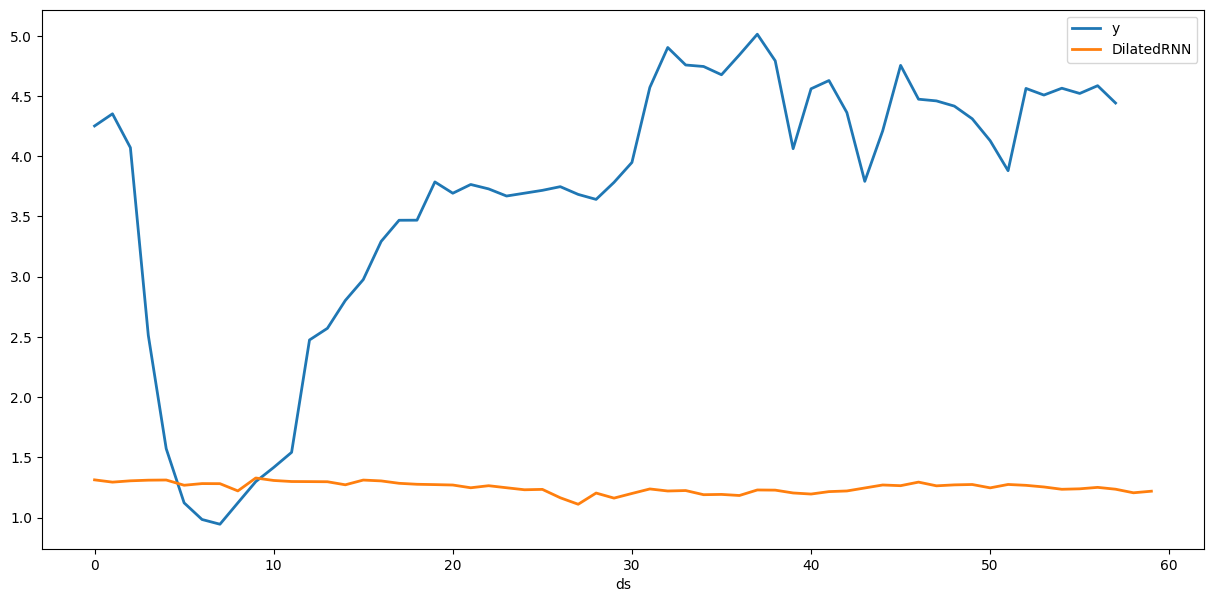

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,1.313795
1,1.294883
2,1.305838
3,1.311141
4,1.312524
5,1.269013
6,1.282785
7,1.282142
8,1.222058


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 2.445
DilatedRNN MSE: 7.158
